In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [2]:
# Seeds for repoducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
try:
          df = pd.read_csv("ML-Dataset.csv")
except FileNotFoundError:
          print("Error: 'ML-Dataset.csv' not found. Please ensure the file is in the correct path.")
          exit()

In [4]:
df

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerName,CustomerAddress,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5151238181,...,Flor Stone,2904 S Salina St,5000,flor.stone@raytheon.com,13171234104,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5151238080,...,Lavera Emerson,"5344 Haverford Ave, Philadelphia",5000,lavera.emerson@plainsallamerican.com,13171234111,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5151234444,...,Fern Head,"1795 Wu Meng, Muang Chonburi",1200,fern.head@usfoods.com,18121234115,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5151234567,...,Shyla Ortiz,"Walpurgisstr 69, Munich",2400,shyla.ortiz@abbvie.com,13171234126,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5151234569,...,Jeni Levy,"Via Frenzy 6903, Roma",1200,jeni.levy@centene.com,18121214129,Shipped,09-Apr-17,106,109.99,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Veera Abdellah,VeeraAbdellah@gmail.com,8788092231,...,Vega Vincent,4284 Dorigo Ln,4900,VegaVincent@gmail.com,787879874,Shipped,27-Sep-17,32,725.99,107
396,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Vega Vincent,VegaVincent@gmail.com,6700989921,...,Villanueva Noah,6794 Lake Dr E,5000,VillanuevaNoah@gmail.com,785811219,Pending,16-Aug-16,66,798.26,118
397,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Villanueva Noah,VillanuevaNoah@gmail.com,7890991231,...,Voldemort Lord,31 Douglas Blvd #950,4000,VoldemortLord@gmail.com,789243757,Canceled,27-May-16,82,849.99,118
398,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Zima Colleen,ZimaColleen@gmail.com,8690991436,...,Lucy Cechtelar,44 W 4th St,3000,LucyCechtelar@gmail.com,964940981,Shipped,27-May-17,157,821.99,95


In [5]:
TARGET_COLUMN = 'Profit'
y = df[TARGET_COLUMN]

In [6]:
y

0      542.95
1      448.71
2      625.54
3      410.59
4      489.58
        ...  
395    185.63
396    168.84
397    121.04
398    147.64
399     96.81
Name: Profit, Length: 400, dtype: float64

In [7]:
# Feature Selection and Data Leakage Mitigation
COLUMNS_TO_DROP = [
    'CustomerName', 'CustomerAddress', 'CustomerEmail', 'CustomerPhone',
    'EmployeeName', 'EmployeeEmail', 'EmployeePhone', 'EmployeeHireDate',
    'WarehouseAddress', 'WarehouseName', 'PostalCode',
    'ProductStandardCost', 'ProductListPrice' # Data Leakage
]

X = df.drop(COLUMNS_TO_DROP + [TARGET_COLUMN], axis=1)

In [8]:
X

,RegionName,CountryName,State,City,EmployeeJobTitle,CategoryName,ProductName,ProductDescription,CustomerCreditLimit,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,Public Accountant,CPU,Intel Xeon E5-2699 V3 (OEM/Tray),"Speed:2.3GHz,Cores:18,TDP:145W",5000,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,Accounting Manager,CPU,Intel Xeon E5-2697 V3,"Speed:2.6GHz,Cores:14",5000,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,Administration Assistant,CPU,Intel Xeon E5-2698 V3 (OEM/Tray),Speed:2.3GHz,1200,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,President,CPU,Intel Xeon E5-2697 V4,"Cores:18,TDP:145W",2400,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,Administration Vice President,CPU,Intel Xeon E5-2685 V3 (OEM/Tray),"Speed:2.6GHz,Cores:12",1200,Shipped,09-Apr-17,106,109.99,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,Stock Clerk,Video Card,MSI GTX 1080 TI LIGHTNING Z,Chipset:GeForce GTX 1080 Ti,4900,Shipped,27-Sep-17,32,725.99,107
396,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Asus ROG-POSEIDON-GTX1080TI-P11G-GAMING,Chipset:GeForce GTX 1080 Ti,5000,Pending,16-Aug-16,66,798.26,118
397,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,MSI GTX 1080 TI LIGHTNING X,Chipset:GeForce GTX 1080 Ti,4000,Canceled,27-May-16,82,849.99,118
398,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Zotac ZT-P10810A-10P,Chipset:GeForce GTX 1080 Ti,3000,Shipped,27-May-17,157,821.99,95


In [9]:
print(f"Original shape: {df.shape}")

Original shape: (400, 28)


In [10]:
# Feature Engineering (Temporal Data)
# Convert OrderDate to datetime and extract useful features
X['OrderDate'] = pd.to_datetime(X['OrderDate'], format='%d-%b-%y')
X['Order_Month'] = X['OrderDate'].dt.month
X['Order_Year'] = X['OrderDate'].dt.year
X['Order_Weekday'] = X['OrderDate'].dt.dayofweek

X = X.drop('OrderDate', axis=1)

In [11]:
X

,RegionName,CountryName,State,City,EmployeeJobTitle,CategoryName,ProductName,ProductDescription,CustomerCreditLimit,Status,OrderItemQuantity,PerUnitPrice,TotalItemQuantity,Order_Month,Order_Year,Order_Weekday
0,South America,United States of America,Texas,Southlake,Public Accountant,CPU,Intel Xeon E5-2699 V3 (OEM/Tray),"Speed:2.3GHz,Cores:18,TDP:145W",5000,Shipped,132,469.99,122,11,2016,3
1,South America,United States of America,Texas,Southlake,Accounting Manager,CPU,Intel Xeon E5-2697 V3,"Speed:2.6GHz,Cores:14",5000,Shipped,124,519.99,123,2,2017,0
2,South America,United States of America,Texas,Southlake,Administration Assistant,CPU,Intel Xeon E5-2698 V3 (OEM/Tray),Speed:2.3GHz,1200,Canceled,92,800.74,123,1,2017,1
3,South America,United States of America,Texas,Southlake,President,CPU,Intel Xeon E5-2697 V4,"Cores:18,TDP:145W",2400,Pending,128,849.99,124,10,2017,6
4,South America,United States of America,Texas,Southlake,Administration Vice President,CPU,Intel Xeon E5-2685 V3 (OEM/Tray),"Speed:2.6GHz,Cores:12",1200,Shipped,106,109.99,125,4,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,Stock Clerk,Video Card,MSI GTX 1080 TI LIGHTNING Z,Chipset:GeForce GTX 1080 Ti,4900,Shipped,32,725.99,107,9,2017,2
396,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Asus ROG-POSEIDON-GTX1080TI-P11G-GAMING,Chipset:GeForce GTX 1080 Ti,5000,Pending,66,798.26,118,8,2016,1
397,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,MSI GTX 1080 TI LIGHTNING X,Chipset:GeForce GTX 1080 Ti,4000,Canceled,82,849.99,118,5,2016,4
398,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Zotac ZT-P10810A-10P,Chipset:GeForce GTX 1080 Ti,3000,Shipped,157,821.99,95,5,2017,5


In [12]:
# Preprocessing
NUMERICAL_FEATURES = ['CustomerCreditLimit', 'OrderItemQuantity', 'TotalItemQuantity', 'Order_Month', 'Order_Year', 'Order_Weekday']
CATEGORICAL_FEATURES = X.select_dtypes(include=['object']).columns.tolist()

In [13]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
preprocessor = ColumnTransformer(
          transformers=[
                    ('num', StandardScaler(), NUMERICAL_FEATURES),
                    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), CATEGORICAL_FEATURES)
          ],
          remainder='passthrough'
)

In [15]:
print("Preprocessing data...")
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

input_dim = X_train.shape[1]
print(f"Processed feature count (Input Dimension): {input_dim}")

Preprocessing data...
Processed feature count (Input Dimension): 498


In [16]:
X_train

array([[ 1.93470588e-01,  1.20495243e+00, -2.06006865e-02, ...,
         1.00000000e+00,  0.00000000e+00,  8.49990000e+02],
       [-8.99981044e-01, -2.74234458e-01, -6.56500237e-02, ...,
         0.00000000e+00,  0.00000000e+00,  8.99990000e+02],
       [-5.78377623e-01, -3.34609433e-01,  1.07559985e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.68900000e+01],
       ...,
       [-9.64301728e-01,  1.11438997e+00,  7.90287383e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.89999000e+03],
       [ 7.08036062e-01, -3.34609433e-01,  1.31586298e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.46996000e+03],
       [ 1.93470588e-01, -7.57234259e-01, -1.77752484e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.46996000e+03]],
      shape=(320, 498))

In [17]:
X_test

array([[-1.15726378e+00, -1.66285889e+00, -4.41061167e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.13990000e+02],
       [ 1.29149904e-01,  5.40827707e-01,  8.65369611e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.95720000e+02],
       [ 2.57791272e-01, -1.42135899e+00,  8.65369611e-01, ...,
         1.00000000e+00,  0.00000000e+00,  5.73990000e+02],
       ...,
       [-1.15726378e+00,  7.21952633e-01,  1.27081365e+00, ...,
         1.00000000e+00,  0.00000000e+00,  6.44000000e+02],
       [-1.09294310e+00,  1.44645234e+00, -2.75880264e-01, ...,
         0.00000000e+00,  1.00000000e+00,  4.39900000e+01],
       [-3.85415570e-01,  9.03077559e-01,  8.95402503e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.49900000e+01]],
      shape=(80, 498))

In [18]:
y_train

3      410.59
18     526.88
202    118.71
250    346.35
274     14.81
        ...  
71     519.86
106    218.37
270      0.00
348      0.00
102    226.48
Name: Profit, Length: 320, dtype: float64

In [19]:
# Defining Deep Learning Architectures (With L2 Regularization)
L2_REG = 0.001 # Define L2 regularization strength

def build_simple_dnn(input_dim):
          """A baseline, shallow neural network with L2 regularization."""
          model = Sequential([
                    Input(shape=(input_dim,)),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(1, activation='linear') # Linear activation for regression
          ], name="Simple_DNN_3_Layers_L2")
          return model

def build_deep_dnn(input_dim):
          """A deeper network with L2 regulariation and increased capacity (6 layers)."""
          model = Sequential([
                    Input(shape=(input_dim,)),
                    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(1, activation='linear')
          ], name="Deep_DNN_6_Layers_L2")
          return model

def build_regularized_dnn(input_dim):
          """Deep network with Dropout, BatchNormalization and L2 regularization."""
          model = Sequential([
                    Input(shape=(input_dim,)),
                    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    BatchNormalization(),
                    Dropout(0.3),
                    
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    BatchNormalization(),
                    Dropout(0.3),
                    
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dense(1, activation='linear')
          ], name="Regularized_DNN_Robust")
          return model

def build_wide_network(input_dim):
          """A very wide network with fewer layers and L2 regularization."""
          model = Sequential([
                    Input(shape=(input_dim,)),
                    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)),
                    Dropout(0.2),
                    Dense(1, activation='linear')
          ], name="Wide_Network_L2")
          return model

# Dictionary of model builders
model_builders = [
          build_simple_dnn,
          build_deep_dnn,
          build_regularized_dnn,
          build_wide_network
]

In [20]:
# Training Loop
results = {}
BATCH_SIZE = 64
EPOCHS = 300
PATIENCE = 20

# Callbacks for training
callbacks = [
          EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1),
          ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)
]

print("\n" + "="*80)
print("STARTING TENSORFLOW MODEL TRAINING")
print("="*80)

for builder in model_builders:
          # Build Model
          model = builder(input_dim)
          model_name = model.name
          print(f"\nTraining {model_name}...")
          
          # Compile
          # RMSprop for the Regularized/Robust model for diversification
          optimizer = 'rmsprop' if model_name == 'Regularized_DNN_Robust' else 'adam'
          model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])
          
          # Train
          history = model.fit(
                    X_train, y_train,
                    validation_split=0.2, # Use 20% of train data for validation during training
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks,
                    verbose=1
          )
          
          # Evaluate on Test Set
          print(f"Evalutaing {model_name} on Test Set...")
          y_pred = model.predict(X_test).flatten()
          
          # Calculate Metrics
          mae = mean_absolute_error(y_test, y_pred)
          mse = mean_squared_error(y_test, y_pred)
          r2 = r2_score(y_test, y_pred)
          
          results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}


STARTING TENSORFLOW MODEL TRAINING

Training Simple_DNN_3_Layers_L2...
Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 147.6548 - mae: 147.9987 - val_loss: 197.8736 - val_mae: 198.2274 - learning_rate: 0.0010
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 146.9962 - mae: 147.3515 - val_loss: 197.4813 - val_mae: 197.8440 - learning_rate: 0.0010
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 146.5693 - mae: 146.9349 - val_loss: 197.7719 - val_mae: 198.1427 - learning_rate: 0.0010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 146.2126 - mae: 146.5863 - val_loss: 198.5029 - val_mae: 198.8810 - learning_rate: 0.0010
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 146.0568 - mae: 146.4364 - val_loss: 199.2116 - val_mae: 199.5963 - learning_rate: 0.0010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 146.0472 - mae: 146.4322 - val_loss: 199.5485 - val_mae: 199.9390 - learning_rate: 0.0010
Epoch 7/300
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [21]:
# Display Results

metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

print("\n" + "="*80)
print("                       DEEP LEARNING MODEL COMPARISON")
print("="*80)
print(metrics_df.to_markdown(floatfmt=".3f"))
print("="*80)


                       DEEP LEARNING MODEL COMPARISON
|                        |     MAE |       MSE |     R2 |
|:-----------------------|--------:|----------:|-------:|
| Wide_Network_L2        | 104.860 | 42713.808 |  0.097 |
| Deep_DNN_6_Layers_L2   | 175.244 | 66033.791 | -0.396 |
| Simple_DNN_3_Layers_L2 | 179.651 | 69654.026 | -0.473 |
| Regularized_DNN_Robust | 210.532 | 90952.389 | -0.923 |


C:\Users\Rayquaza\AppData\Local\Temp\ipykernel_9720\3900825063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Model', y='R2', data=plot_df.sort_values(by='R2', ascending=False), palette='viridis')
C:\Users\Rayquaza\AppData\Local\Temp\ipykernel_9720\3900825063.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Model', y='MAE', data=plot_df.sort_values(by='MAE', ascending=True), palette='plasma')


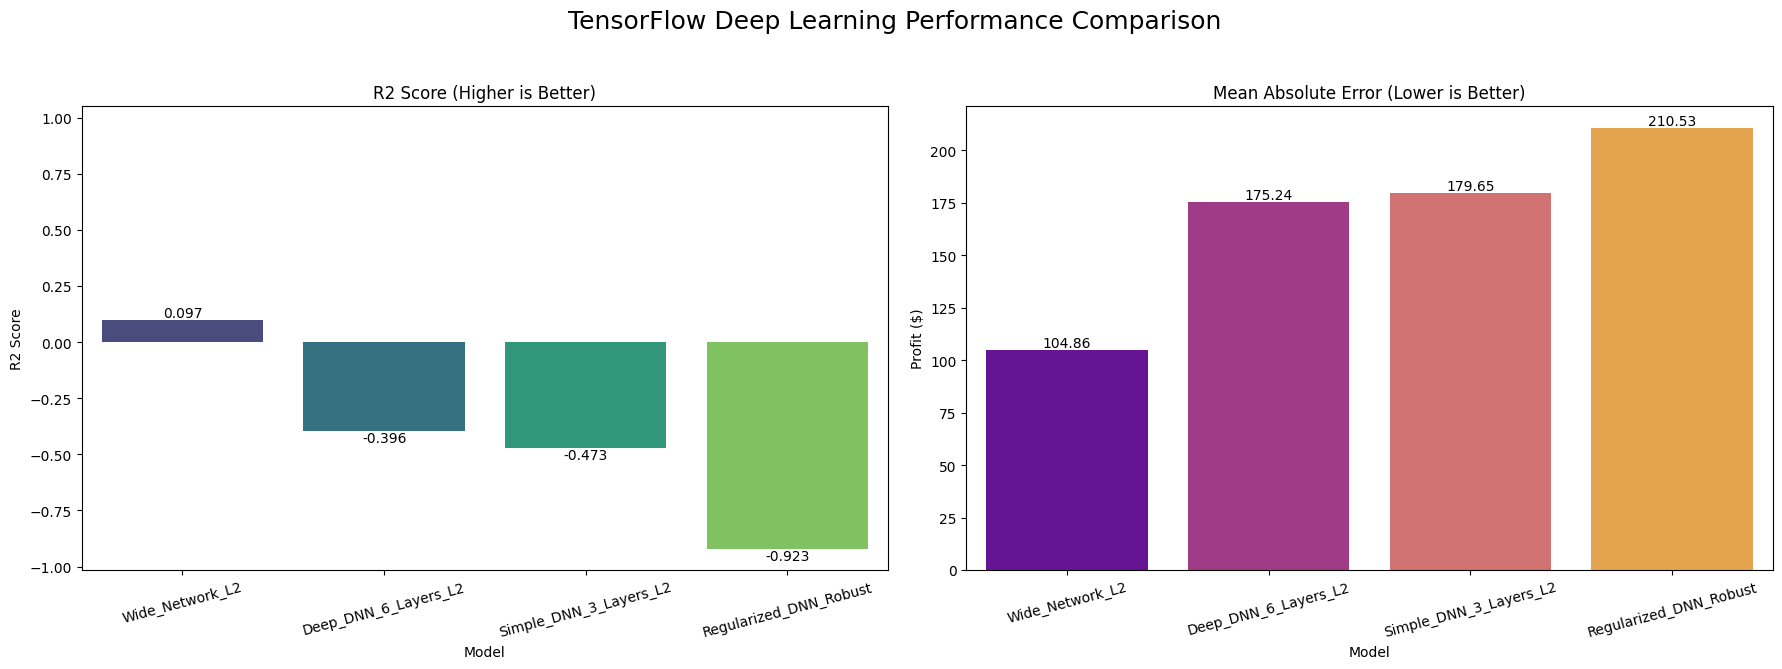

In [22]:
# Visualization

# Prepare data for plotting
metrics_to_plot = ['R2', 'MAE']
plot_df = metrics_df[metrics_to_plot].reset_index().rename(columns={'index': 'Model'})

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('TensorFlow Deep Learning Performance Comparison', fontsize=18)

# Plot R2 Score
sns.barplot(ax=axes[0], x='Model', y='R2', data=plot_df.sort_values(by='R2', ascending=False), palette='viridis')
axes[0].set_title('R2 Score (Higher is Better)')
axes[0].set_ylim(min(plot_df['R2'].min(), 0) * 1.1, max(plot_df['R2'].max(), 1.0) * 1.05)
axes[0].set_ylabel('R2 Score')
axes[0].tick_params(axis='x', rotation=15)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f')

# Plot MAE (Mean Absolute Error)
sns.barplot(ax=axes[1], x='Model', y='MAE', data=plot_df.sort_values(by='MAE', ascending=True), palette='plasma')
axes[1].set_title('Mean Absolute Error (Lower is Better)')
axes[1].set_ylabel('Profit ($)')
axes[1].tick_params(axis='x', rotation=15)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
print("\n--- Summary ---")
best_model = metrics_df.index[0]
best_r2 = metrics_df.iloc[0]['R2']
best_mae = metrics_df.iloc[0]['MAE']

print(f"The best performing DL architecture is {best_model}.")
print(f"R2: {best_r2}, MAE: {best_mae}")


--- Summary ---
The best performing DL architecture is Wide_Network_L2.
R2: 0.09688439673898874, MAE: 104.85967251873016
